In [115]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import warnings

Populating the interactive namespace from numpy and matplotlib


In [116]:
def f(x, reg):
    return reg[0]+ x*reg[1]

In [117]:
import warnings
warnings.filterwarnings('ignore')

            x         y
0   -0.110299  0.252064
1    2.053240 -0.324025
2    0.337560 -0.027456
3    0.371276  0.425773
4   -0.092864 -0.369919
..        ...       ...
995 -1.285877  0.277068
996  0.149209  0.350022
997 -0.094531  0.434381
998  0.087508  1.292354
999  0.044007  1.148659

[1000 rows x 2 columns]


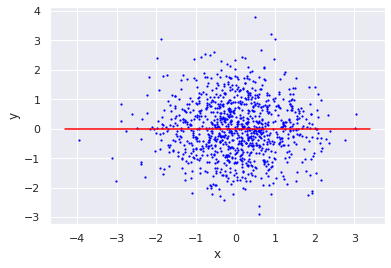

In [108]:
dataFrame=pd.read_csv('data/gauss_R2.csv')

ax= dataFrame.plot(kind='scatter',s=1.4,x="x",y="y", color = 'blue');
x0,x1=xlim()
ax.plot([x0,x1],[0,0], color = 'red');
print (dataFrame)

In [109]:
def y_minus_x(dataFrame):
    
    dataFrame['y_minus_x'] = dataFrame['y']- dataFrame['x']
    print (dataFrame.shape)
    print (dataFrame.columns)
    print (dataFrame.head())
 

In [110]:
y_minus_x(dataFrame) 


(1000, 3)
Index(['x', 'y', 'y_minus_x'], dtype='object')
          x         y  y_minus_x
0 -0.110299  0.252064   0.362363
1  2.053240 -0.324025  -2.377266
2  0.337560 -0.027456  -0.365015
3  0.371276  0.425773   0.054497
4 -0.092864 -0.369919  -0.277055


(1000, 3)
Index(['x', 'y', 'y_minus_x'], dtype='object')
          x         y  y_minus_x
0 -0.110299  0.252064   0.362363
1  2.053240 -0.324025  -2.377266
2  0.337560 -0.027456  -0.365015
3  0.371276  0.425773   0.054497
4 -0.092864 -0.369919  -0.277055


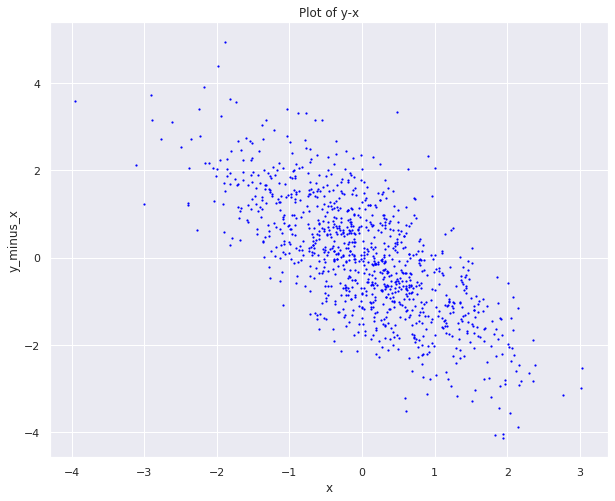

In [111]:
dataFrame=pd.read_csv('data/gauss_R2.csv')
assert y_minus_x(dataFrame) == None 
assert dataFrame.shape == (1000, 3)
assert all( dataFrame.columns.values == array(['x', 'y', 'y_minus_x']))
assert sum(abs( array(dataFrame['y_minus_x'])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= dataFrame.plot(kind='scatter',s=1.4,x='x',y='y_minus_x',figsize=[10,8], title='Plot of y-x', color = 'blue');

In [112]:
def do_regression(dataFrame):
    
    y = dataFrame['y_minus_x']
    x =dataFrame['x']    
    A = np.vstack([x, np.ones(len(x))]).T
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return np.array([w0,w1])

    
w = do_regression(dataFrame)
print (type(w))
print (w.shape)


<class 'numpy.ndarray'>
(2,)


LINEAR REGRESSION EQUATION:
y_minus_x = 0.02 + -1.01 x


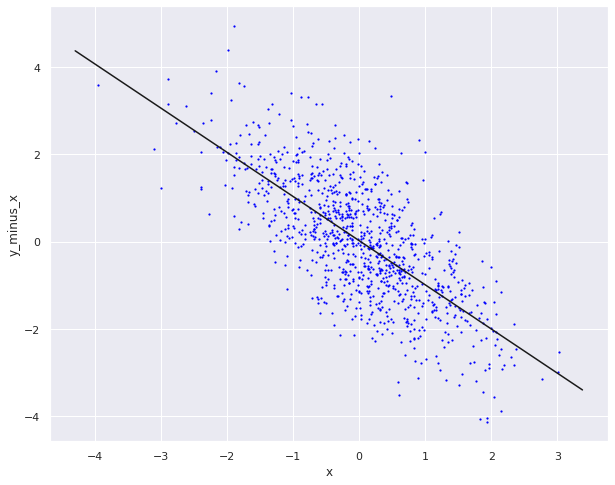

In [114]:
w_df = do_regression(dataFrame)
assert str(type(w_df)) == "<class 'numpy.ndarray'>"
assert w_df.shape == (2,)
assert sum(abs(w_df[0] - 0.02173387)) < 10**-5

# Plot Graph
print("LINEAR REGRESSION EQUATION:")
print("y_minus_x = {:.2f} + {:.2f} x".format(w_df[0],w_df[1]))
ax= dataFrame.plot(kind='scatter',s=1.4,x='x',y='y_minus_x',figsize=[10,8], color='blue');
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_df),f(x1,w_df)],'k');
